# Transform CH4 and N2O emissions to CO2eq and plot

From: https://ghgprotocol.org/sites/default/files/Global-Warming-Potential-Values%20(Feb%2016%202016)_1.pdf

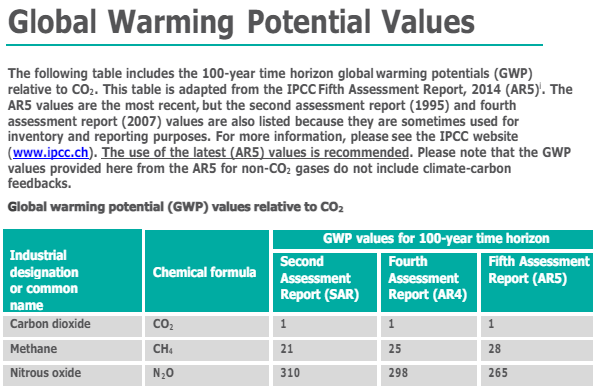

To convert CH4 and N2O emissions to CO2eq, we need to multiply the emissions for each gas Global Warming Potential (GWP) value.

**GWP CH4 = 28**

**GWP N2O = 265**

In [2]:
import pandas as pd
import numpy as np

In [3]:
emissions_df = pd.read_parquet(r'C:\Users\HP\Desktop\FAO_CARBON_FOOTPRINT\fao_carbon_footprint\data\FAOSTAT\clean_data\all_tables_processed-20240805T154622Z-001\all_tables_processed\tablas_emisiones\merged_food_emissions_v2.parquet')

In [4]:
emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252987 entries, 0 to 252986
Data columns (total 22 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Area Code                                          252987 non-null  int64  
 1   Area                                               252987 non-null  object 
 2   Year                                               252987 non-null  int64  
 3   Item Code                                          252987 non-null  int64  
 4   Item                                               252987 non-null  object 
 5   Stocks_(An)                                        252987 non-null  float64
 6   crops_or_livestock                                 252987 non-null  object 
 7   Burning_crop_residues_(Emissions_CH4_CO2eq)_(kt)   252987 non-null  float64
 8   Burning_crop_residues_(Emissions_N2O_CO2eq)_(kt)   252987 non-null  float6

# Visualize data

With this data better to focus on food items. Country totals are in "emissions_totals" table.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# There are countries and regions
# Function to select either coutries, continents, develop or world

def select_fao_region(df, region='country', path_to_areas=None, codes_col='Area Code'):
    """
    Selects data from a DataFrame based on specified FAO region.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing data to be filtered.
    region (str): The region to filter by. Options are 'country', 'continent', 'developed', or 'world'.
                  Default is 'country'.
    path_to_areas (str): Path to the CSV file containing area codes and their definitions. Required if region is 'country'.
    codes_col (str): The column name in df and the area codes file that contains the area codes. Default is 'Area Code'.

    Returns:
    pd.DataFrame: A DataFrame filtered by the specified region.

    Raises:
    ValueError: If region is 'country' and path_to_areas is not provided.
    """
    
    # Make a copy of the input DataFrame to avoid modifying the original data
    df = df.copy()
    
    # Define the area codes for different regions
    continent_codes = [5500, 5400, 5300, 5207, 5204, 5203, 5100]
    developed_codes = [5849, 5848]
    world_codes = [5000]
    
    if region == 'country':
        if not path_to_areas:
            raise ValueError("path_to_areas must be provided when selecting countries.")
        # Read the area codes from the CSV file, ensuring no duplicate entries
        area_codes = pd.read_csv(path_to_areas, encoding="ISO-8859-1").drop_duplicates()
        country_codes = area_codes[area_codes[codes_col] < 3000][codes_col].to_list()
        df = df[df[codes_col].isin(country_codes)]
    elif region == 'continent':
        df = df[df[codes_col].isin(continent_codes)]
    elif region == 'developed':
        df = df[df[codes_col].isin(developed_codes)]
    elif region == 'world':
        df = df[df[codes_col].isin(world_codes)]
    
    return df


## WORLD: Crops vs Livestock, per year.

Just to check

In [41]:
df = select_fao_region(emissions_df, region='world')
df.head()

,Area Code,Area,Year,Item Code,Item,Stocks_(An),crops_or_livestock,Burning_crop_residues_(Emissions_CH4_CO2eq)_(kt),Burning_crop_residues_(Emissions_N2O_CO2eq)_(kt),Crop_residues_(Emissions_N2O_CO2eq)_(kt),...,Rice_cultivation_(Emissions_CH4_CO2eq)_(kt),Synthetic_fertilizers_(Emissions_N2O_CO2eq)_(kt),Emissions_(N2O_CO2eq)_(Manure_applied)_(kt),Enteric_fermentation_(Emissions_CH4_CO2eq)_(kt),Livestock_total_(Emissions_CH4_CO2eq)_(kt),Livestock_total_(Emissions_N2O_CO2eq)_(kt),Manure_left_on_pasture_(Emissions_N2O_CO2eq)_(kt),Manure_management_(Emissions_CH4_CO2eq)_(kt),Manure_management_(Emissions_N2O_CO2eq)_(kt),production_TOTAL_(emissions_CO2eq)_(kt)
201392,5000,World,1961,15,Wheat,0.0,crops,6175.2936,1515.2435,17326.2830,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25016.8201
201393,5000,World,1961,27,Rice,0.0,crops,4796.8816,1177.0240,19760.4405,...,487941.1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,513675.5160
201394,5000,World,1961,44,Barley,0.0,crops,0.0000,0.0000,5440.9800,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5440.9800
201395,5000,World,1961,56,Maize (corn),0.0,crops,7980.3024,1958.1380,10069.1255,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20007.5659
201396,5000,World,1961,71,Rye,0.0,crops,0.0000,0.0000,2544.9805,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2544.9805


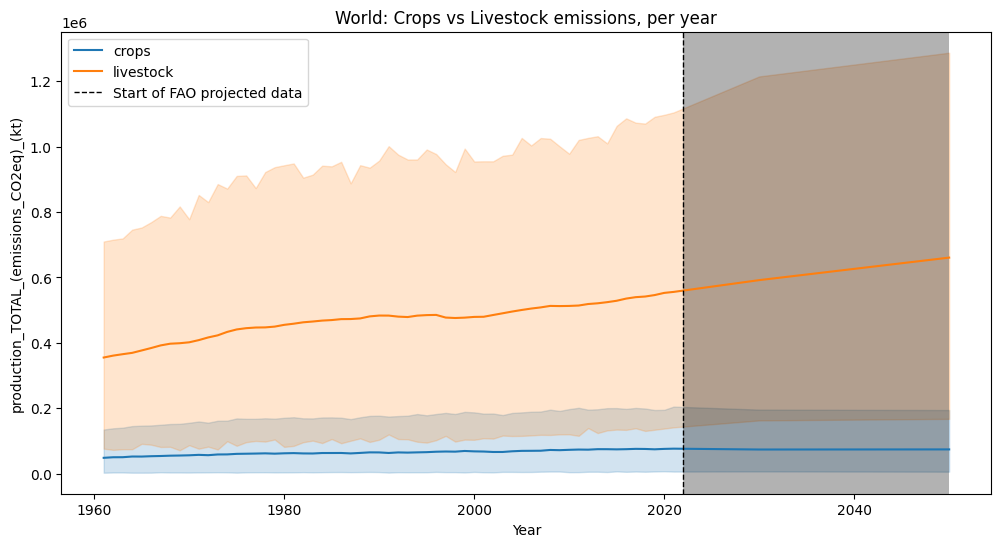

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))  # Create figure and axes first
sns.lineplot(
    data=df, 
    x="Year", 
    y="production_TOTAL_(emissions_CO2eq)_(kt)", 
    hue="crops_or_livestock", 
    ax=ax        # Plot onto the existing axes
)

plt.axvline(x=2022,
    color='black', 
    linestyle='dashed', 
    linewidth=1,
    label='Start of FAO projected data'
)

# Get the axes limits
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

# Add the shaded rectangle
plt.axvspan(
    xmin=2022,  # Start at x=2022
    xmax=2050,  # Extend to the right edge of the plot
    ymin=ymin,  # Bottom edge of the plot
    ymax=ymax,  # Top edge of the plot
    facecolor='black',
    alpha=0.3   # 20% transparency
)

plt.legend()
plt.title('World: Crops vs Livestock emissions, per year')
#plt.yscale('log')
plt.show()

## All crops and livestocks TOTAL emissions

This is a total. Must be normalized by consumption or production levels.

In [43]:
df = select_fao_region(emissions_df, region='country', path_to_areas=r'..\data\FAOSTAT\clean_data\Emissions_E_AreaCodes.csv')
df.head()

,Area Code,Area,Year,Item Code,Item,Stocks_(An),crops_or_livestock,Burning_crop_residues_(Emissions_CH4_CO2eq)_(kt),Burning_crop_residues_(Emissions_N2O_CO2eq)_(kt),Crop_residues_(Emissions_N2O_CO2eq)_(kt),...,Rice_cultivation_(Emissions_CH4_CO2eq)_(kt),Synthetic_fertilizers_(Emissions_N2O_CO2eq)_(kt),Emissions_(N2O_CO2eq)_(Manure_applied)_(kt),Enteric_fermentation_(Emissions_CH4_CO2eq)_(kt),Livestock_total_(Emissions_CH4_CO2eq)_(kt),Livestock_total_(Emissions_N2O_CO2eq)_(kt),Manure_left_on_pasture_(Emissions_N2O_CO2eq)_(kt),Manure_management_(Emissions_CH4_CO2eq)_(kt),Manure_management_(Emissions_N2O_CO2eq)_(kt),production_TOTAL_(emissions_CO2eq)_(kt)
0,1,Armenia,1992,15,Wheat,0.0,crops,1.9796,0.4770,9.7520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.2086
1,1,Armenia,1992,44,Barley,0.0,crops,0.0000,0.0000,10.7590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.7590
2,1,Armenia,1992,56,Maize (corn),0.0,crops,0.0980,0.0265,0.1855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3100
3,1,Armenia,1992,71,Rye,0.0,crops,0.0000,0.0000,0.0795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0795
4,1,Armenia,1992,75,Oats,0.0,crops,0.0000,0.0000,0.1590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1590


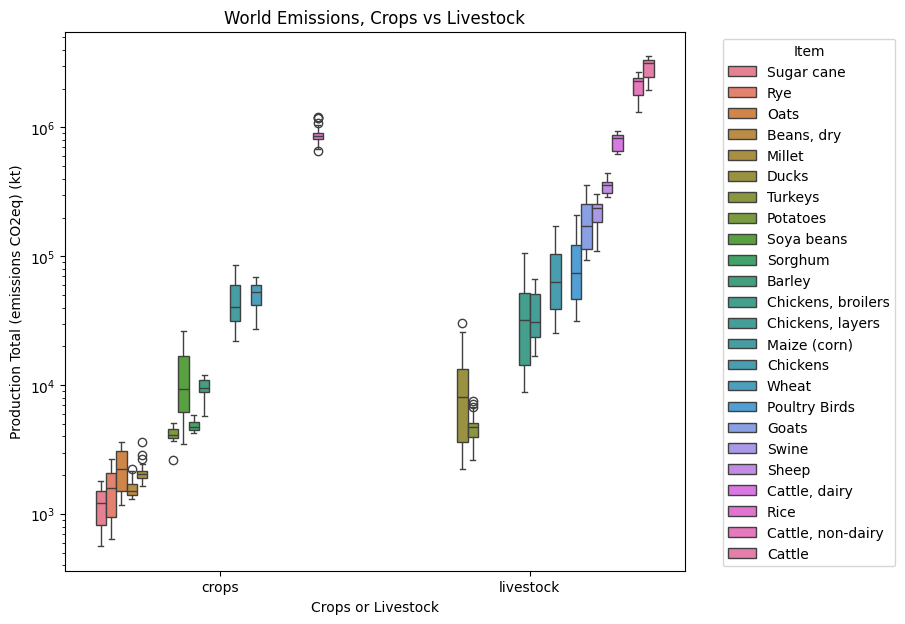

In [44]:
# Group by 'crops_or_livestock' and 'Item', then sum the emissions
df_grouped = df[df['production_TOTAL_(emissions_CO2eq)_(kt)'] > 0].groupby(['crops_or_livestock', 'Item', 'Year']).sum().reset_index().sort_values(by = 'production_TOTAL_(emissions_CO2eq)_(kt)')

# Create the plot
plt.figure(figsize=(8, 7))

sns.boxplot(data=df_grouped, x='crops_or_livestock', y='production_TOTAL_(emissions_CO2eq)_(kt)', hue='Item')
plt.yscale('log')

# Adjust the legend position to the right of the plot
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add title and labels
plt.title('World Emissions, Crops vs Livestock')
plt.xlabel('Crops or Livestock')
plt.ylabel('Production Total (emissions CO2eq) (kt)')

# Show the plot
plt.show()

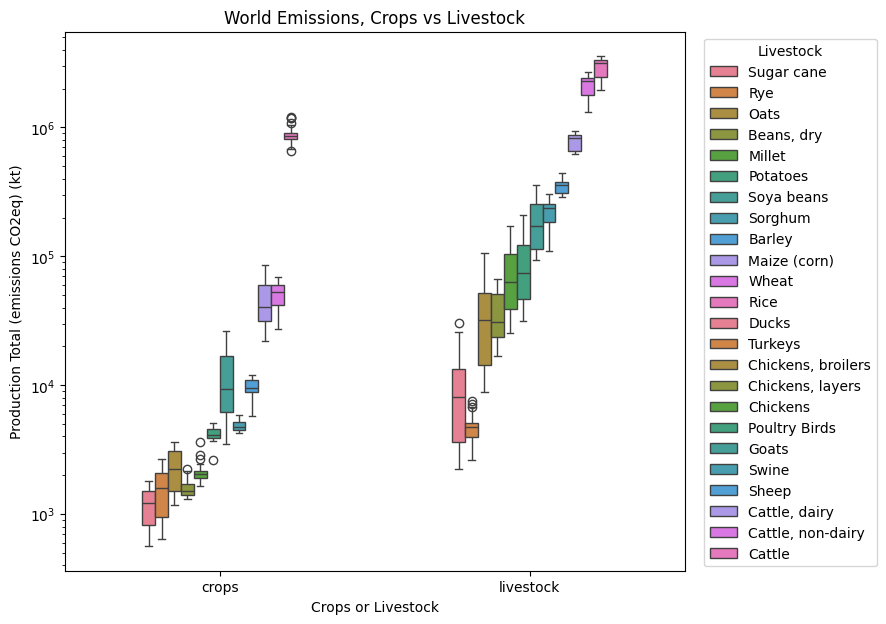

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'crops_or_livestock', 'Item', and 'Year', then sum the emissions
df_grouped = df[df['production_TOTAL_(emissions_CO2eq)_(kt)'] > 0].groupby(
    ['crops_or_livestock', 'Item', 'Year']
).sum().reset_index().sort_values(by='production_TOTAL_(emissions_CO2eq)_(kt)')

# Split the data into crops and livestock
crops_data = df_grouped[df_grouped['crops_or_livestock'] == 'crops']
livestock_data = df_grouped[df_grouped['crops_or_livestock'] == 'livestock']

# Create the plot
plt.figure(figsize=(8, 7))

# Plot crops
ax = sns.boxplot(
    data=crops_data,
    x='crops_or_livestock',
    y='production_TOTAL_(emissions_CO2eq)_(kt)',
    hue='Item',
    width=0.5,
    dodge=True
)
# Adjust the legend for crops
handles, labels = ax.get_legend_handles_labels()
crops_legend = plt.legend(handles, labels, title='Crops', bbox_to_anchor=(1.02, 1), loc='upper left')

# Plot livestock
ax = sns.boxplot(
    data=livestock_data,
    x='crops_or_livestock',
    y='production_TOTAL_(emissions_CO2eq)_(kt)',
    hue='Item',
    width=0.5,
    dodge=True,
    ax=ax
)
# Adjust the legend for livestock
handles, labels = ax.get_legend_handles_labels()
livestock_legend = plt.legend(handles, labels, title='Livestock', bbox_to_anchor=(1.02, 1), loc='upper left')

# Add title and labels
plt.title('World Emissions, Crops vs Livestock')
plt.xlabel('Crops or Livestock')
plt.ylabel('Production Total (emissions CO2eq) (kt)')
plt.yscale('log')

# Show the plot
plt.show()
